In [1]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Assuming "train.csv" is in the specified path ("/kaggle/input/digit-recognizer/train.csv")
file_path = "/kaggle/input/digit-recognizer/train.csv"

# Load the CSV file using pandas
df = pd.read_csv(file_path)

# Extract the pixel values and target labels
X = df.drop("label", axis=1)  # Features (pixel values)
y = df["label"]                # Target labels

# Combine pixel values and labels into a list of tuples
imgLabel = list(zip(X.values, y.values))

# Display the first few entries in imgLabel
#print(imgLabel[:5])

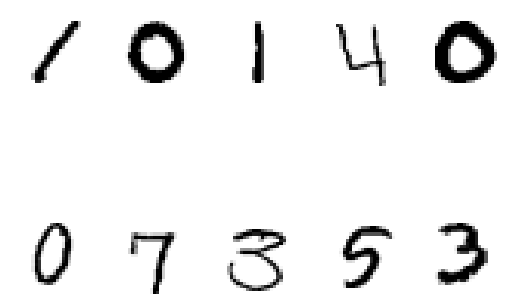

In [3]:
# Function to reshape flattened array to a 2D array
def reshape_image(flat_image):
    return flat_image.reshape(28, 28)  # Assuming the images are 28x28 pixels

# Display the first 10 images
for index, (flat_image, label) in enumerate(imgLabel[:10]):
    # Reshape the flattened image to 2D
    image = reshape_image(flat_image)

    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)

plt.show()

In [4]:
n = len(imgLabel)

In [5]:
# Assuming 'n' is the number of samples in your dataset
n = X.shape[0]

# Reshape the flattened pixel values into a 2D array
data = X.values.reshape((n, -1))

# 'data' now contains the reshaped pixel values
print(data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'data' contains the reshaped pixel values and 'y' contains the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.7, random_state=42)


In [7]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

In [10]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))

Decision Tree:
Accuracy: 0.820374149659864
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      2905
           1       0.93      0.94      0.93      3271
           2       0.80      0.78      0.79      2988
           3       0.79      0.78      0.78      3059
           4       0.83      0.81      0.82      2877
           5       0.74      0.76      0.75      2631
           6       0.84      0.85      0.84      2896
           7       0.85      0.87      0.86      3043
           8       0.75      0.72      0.74      2842
           9       0.77      0.78      0.78      2888

    accuracy                           0.82     29400
   macro avg       0.82      0.82      0.82     29400
weighted avg       0.82      0.82      0.82     29400



In [11]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest:
Accuracy: 0.9518707482993197
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2905
           1       0.98      0.98      0.98      3271
           2       0.95      0.95      0.95      2988
           3       0.94      0.93      0.93      3059
           4       0.96      0.95      0.95      2877
           5       0.95      0.94      0.94      2631
           6       0.96      0.97      0.96      2896
           7       0.96      0.96      0.96      3043
           8       0.94      0.93      0.94      2842
           9       0.92      0.93      0.92      2888

    accuracy                           0.95     29400
   macro avg       0.95      0.95      0.95     29400
weighted avg       0.95      0.95      0.95     29400



In [12]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [13]:
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM:
Accuracy: 0.9655442176870749
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2905
           1       0.98      0.98      0.98      3271
           2       0.97      0.96      0.96      2988
           3       0.96      0.95      0.95      3059
           4       0.96      0.96      0.96      2877
           5       0.96      0.96      0.96      2631
           6       0.97      0.98      0.98      2896
           7       0.96      0.97      0.97      3043
           8       0.96      0.96      0.96      2842
           9       0.95      0.94      0.95      2888

    accuracy                           0.97     29400
   macro avg       0.97      0.97      0.97     29400
weighted avg       0.97      0.97      0.97     29400



In [14]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [15]:
print("K-Nearest Neighbors (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN):
Accuracy: 0.9509863945578231
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2905
           1       0.92      0.99      0.96      3271
           2       0.98      0.92      0.95      2988
           3       0.94      0.95      0.95      3059
           4       0.97      0.94      0.95      2877
           5       0.94      0.94      0.94      2631
           6       0.97      0.98      0.97      2896
           7       0.94      0.96      0.95      3043
           8       0.98      0.89      0.93      2842
           9       0.92      0.93      0.93      2888

    accuracy                           0.95     29400
   macro avg       0.95      0.95      0.95     29400
weighted avg       0.95      0.95      0.95     29400



In [16]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [17]:
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
Accuracy: 0.5758503401360544
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.96      0.68      2905
           1       0.68      0.96      0.80      3271
           2       0.87      0.35      0.50      2988
           3       0.78      0.29      0.42      3059
           4       0.84      0.17      0.28      2877
           5       0.68      0.09      0.16      2631
           6       0.66      0.93      0.77      2896
           7       0.89      0.49      0.63      3043
           8       0.35      0.54      0.43      2842
           9       0.43      0.91      0.58      2888

    accuracy                           0.58     29400
   macro avg       0.67      0.57      0.53     29400
weighted avg       0.67      0.58      0.53     29400



In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic_classifier = LogisticRegression(solver='liblinear')  # or 'saga', 'newton-cg', etc.

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_classifier.predict(X_test_scaled)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression:
Accuracy: 0.8810544217687075
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2905
           1       0.93      0.96      0.95      3271
           2       0.87      0.84      0.85      2988
           3       0.85      0.84      0.85      3059
           4       0.89      0.88      0.88      2877
           5       0.83      0.82      0.82      2631
           6       0.91      0.93      0.92      2896
           7       0.90      0.91      0.90      3043
           8       0.84      0.83      0.83      2842
           9       0.84      0.85      0.85      2888

    accuracy                           0.88     29400
   macro avg       0.88      0.88      0.88     29400
weighted avg       0.88      0.88      0.88     29400



**MNIST digit recognizer using CNN**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, Sequential, optimizers, callbacks
from tensorflow.keras.layers import Input, InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

2024-02-02 19:22:55.868323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 19:22:55.868510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 19:22:56.035103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Separate Label and Features

y_train_full = train_df['label']
X_train_full = train_df.drop(columns = ['label'], axis = 1)

In [25]:
# Check shape of features

X_train_full.shape

(42000, 784)

In [26]:
# Consider last 5000 records for validation dataset

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [27]:
# Normalize training, validation and test dataset

X_train, X_valid, test_df = X_train / 255.0, X_valid / 255.0, test_df / 255.0

In [28]:
# Check shape of training, validation and test dataset

print(X_train.shape)
print(X_valid.shape)
print(test_df.shape)

(37000, 784)
(5000, 784)
(28000, 784)


In [29]:
# Reshape datasets to apply CNN

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_valid = X_valid.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

# Recheck the shape of all datasets

print(X_train.shape)
print(X_valid.shape)
print(test_df.shape)

(37000, 28, 28, 1)
(5000, 28, 28, 1)
(28000, 28, 28, 1)


In [30]:
# Label Encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_valid = to_categorical(y_valid, num_classes = 10)

In [31]:
# Build model

model = Sequential()
model.add(InputLayer(input_shape = [28, 28, 1]))

model.add(Conv2D(32, (3,3), activation = 'elu', kernel_initializer = 'he_normal')),
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.2)),

model.add(Conv2D(64, (3,3), activation = 'elu', kernel_initializer = 'he_normal')),
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.2)),

model.add(Flatten()),
model.add(Dense(800, activation = 'elu', kernel_initializer = 'he_normal')),
model.add(Dropout(0.2)),
model.add(Dense(400, activation = 'elu', kernel_initializer = 'he_normal')),
model.add(Dropout(0.2)),
model.add(Dense(200, activation = 'elu', kernel_initializer = 'he_normal')),
model.add(Dropout(0.2)),
model.add(Dense(100, activation = 'elu', kernel_initializer = 'he_normal')),
model.add(Dropout(0.2)),
model.add(Dense(10, activation = 'sigmoid'))

In [32]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [33]:
# Set optimizer and compile the model

opt = optimizers.SGD(learning_rate = 0.01, momentum = 0.9, nesterov = True)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
# Implement Callbacks


early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2, min_lr = 0.0001)
model_checkpoint = ModelCheckpoint("my_checkpoints", save_best_only = True, monitor = 'val_loss', mode = 'min')

In [35]:
# Train the model

history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), callbacks = [early_stopping, reduce_lr, model_checkpoint])

Epoch 1/30
1157/1157 [==============================] - 30s 25ms/step - loss: 0.2773 - accuracy: 0.9203 - val_loss: 0.0852 - val_accuracy: 0.9740 - lr: 0.0100
Epoch 2/30
1157/1157 [==============================] - 28s 24ms/step - loss: 0.1117 - accuracy: 0.9672 - val_loss: 0.0709 - val_accuracy: 0.9810 - lr: 0.0100
Epoch 3/30
1157/1157 [==============================] - 28s 24ms/step - loss: 0.0879 - accuracy: 0.9743 - val_loss: 0.0558 - val_accuracy: 0.9846 - lr: 0.0100
Epoch 4/30
1157/1157 [==============================] - 27s 23ms/step - loss: 0.0698 - accuracy: 0.9793 - val_loss: 0.0642 - val_accuracy: 0.9834 - lr: 0.0100
Epoch 5/30
1157/1157 [==============================] - 29s 25ms/step - loss: 0.0642 - accuracy: 0.9817 - val_loss: 0.0498 - val_accuracy: 0.9842 - lr: 0.0100
Epoch 6/30
1157/1157 [==============================] - 27s 23ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0534 - val_accuracy: 0.9834 - lr: 0.0100
Epoch 7/30
1157/1157 [========================

In [36]:
y_pred = model.predict(test_df)

875/875 [==============================] - 7s 7ms/step


In [37]:
predicted_class = np.argmax(y_pred, axis = 1)
predicted_class[:5]

array([2, 0, 9, 9, 3])

In [38]:
results = pd.Series(predicted_class, name = "Label")
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [39]:
submission = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), results], axis = 1)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [40]:
submission.to_csv("submission.csv", index = False)